## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>


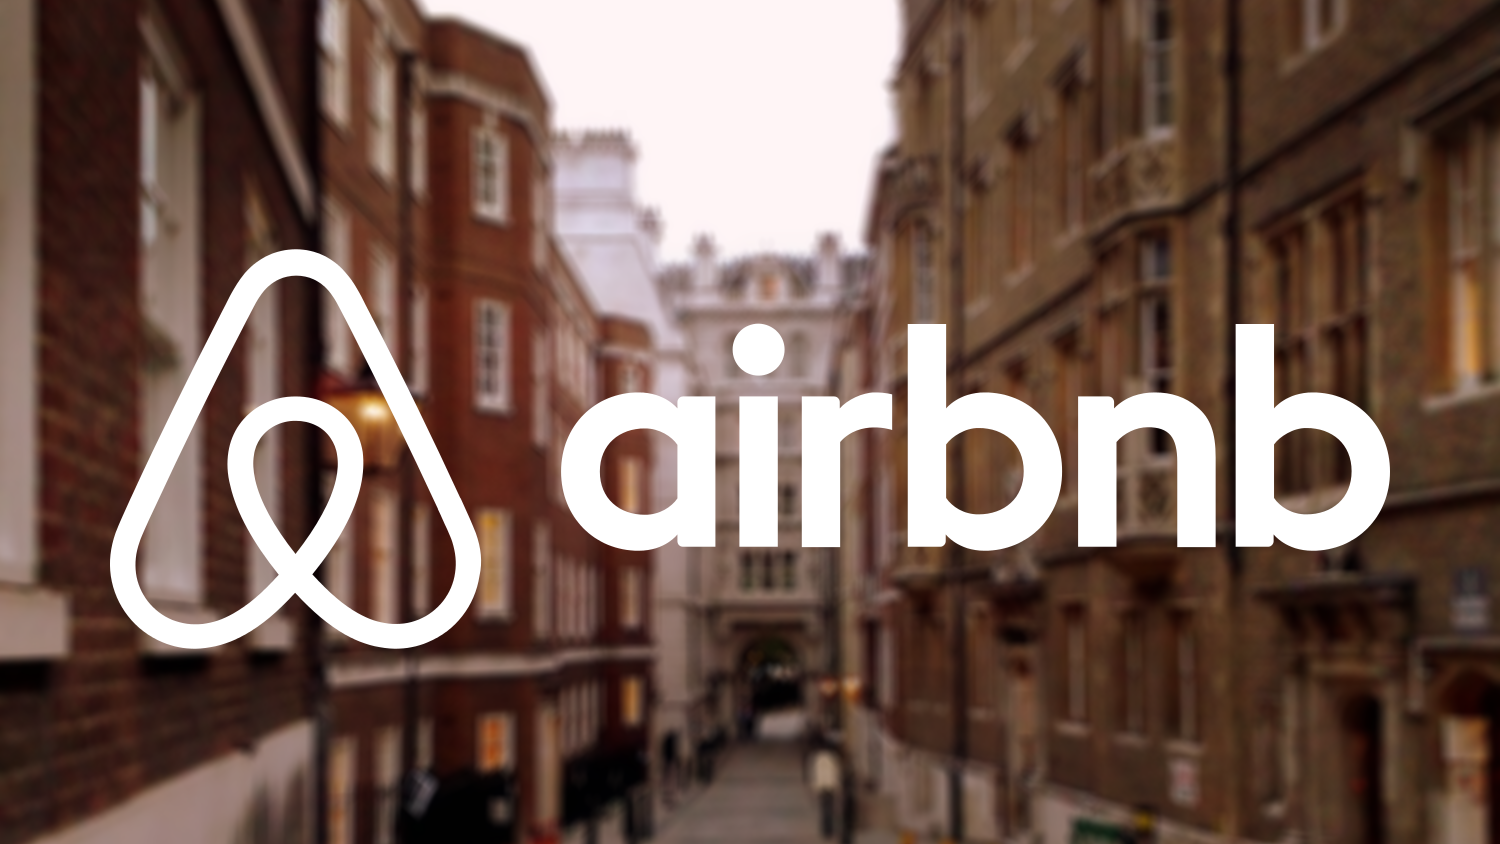

# Data Importing and Data Understanding

In [ ]:
# Importing necessary libraries for analyzing the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing dataset
df = pd.read_csv('/content/drive/MyDrive/Airbnb Booking Analysis/Airbnb NYC 2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Checking the shape of dataset
print(f'The shape of dataset is {df.shape}')

The shape of dataset is (7391, 16)


In [ ]:
# Checking the feature names
print(f'The names of the feature present in the dataset are:')
list(df.columns)

The names of the feature present in the dataset are:


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Checking for categorical columns
cat_cols = df.select_dtypes(include='object').columns
print(f'The following are the categorical features in the dataset: {list(cat_cols)}')


The following are the categorical features in the dataset: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [ ]:
# Checking for numerrical/non categorical columns
num_cols = df.select_dtypes(exclude='object').columns
print('The following are the non categorical features in the dataset:')
list(num_cols)

The following are the non categorical features in the dataset:


['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
#Checking first 5 rows of the data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [ ]:
#Checking the last 5 rows of the data
df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7386,5476046,Large Duplex Near Subway! 5bdrm/2ba,10297692,Dee,Brooklyn,Crown Heights,40.67615,-73.92945,Entire home/apt,500.0,1.0,68.0,2019-04-27,1.41,2.0,313.0
7387,5476474,Amazing HK one bedroom apartment,20318406,Dimitriy,Manhattan,Hell's Kitchen,40.76571,-73.99482,Entire home/apt,120.0,1.0,12.0,2018-07-19,0.24,1.0,163.0
7388,5477034,Comfy room in Williamsburg Loft Apt,4687722,Mav,Brooklyn,Williamsburg,40.71538,-73.94527,Private room,85.0,1.0,0.0,NaN,NaN,1.0,0.0
7389,5477876,Stylish Greenpoint Gem,1506972,Vanessa & Christian,Brooklyn,Greenpoint,40.73406,-73.95551,Entire home/apt,135.0,3.0,17.0,2019-06-08,0.32,1.0,8.0
7390,5478741,"Garden, Walk to Empire State, B'way, Subway 2 ...",28411613,Marea,Manhattan,Midtown,40.74447,-7.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7391 entries, 0 to 7390
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7391 non-null   int64  
 1   name                            7384 non-null   object 
 2   host_id                         7391 non-null   int64  
 3   host_name                       7386 non-null   object 
 4   neighbourhood_group             7391 non-null   object 
 5   neighbourhood                   7391 non-null   object 
 6   latitude                        7391 non-null   float64
 7   longitude                       7391 non-null   float64
 8   room_type                       7390 non-null   object 
 9   price                           7390 non-null   float64
 10  minimum_nights                  7390 non-null   float64
 11  number_of_reviews               7390 non-null   float64
 12  last_review                     65

#Data Cleaning

In [ ]:
# Checking the null values
print(f'The missing values before cleaning the data are:')
df.isnull().sum()

The missing values before cleaning the data are:


id                                  0
name                                7
host_id                             0
host_name                           5
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           1
price                               1
minimum_nights                      1
number_of_reviews                   1
last_review                       824
reviews_per_month                 824
calculated_host_listings_count      1
availability_365                    1
dtype: int64

The features like last_review and reviews_per_month have most null values in the dataset.

In [ ]:
# Filling missing values
df['name'].fillna('Absent',inplace = True)
df['host_name'].fillna('Absent',inplace = True)

In [ ]:
# Dropping the unnecessary columns
df = df.drop(['last_review','reviews_per_month'],axis = 1)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,1.0,0.0


In [ ]:
# Checking for null values in the new dataset
print(f'The number of missing values after cleaning the data are:')
df.isnull().sum()

The number of missing values after cleaning the data are:


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         1
price                             1
minimum_nights                    1
number_of_reviews                 1
calculated_host_listings_count    1
availability_365                  1
dtype: int64

#Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

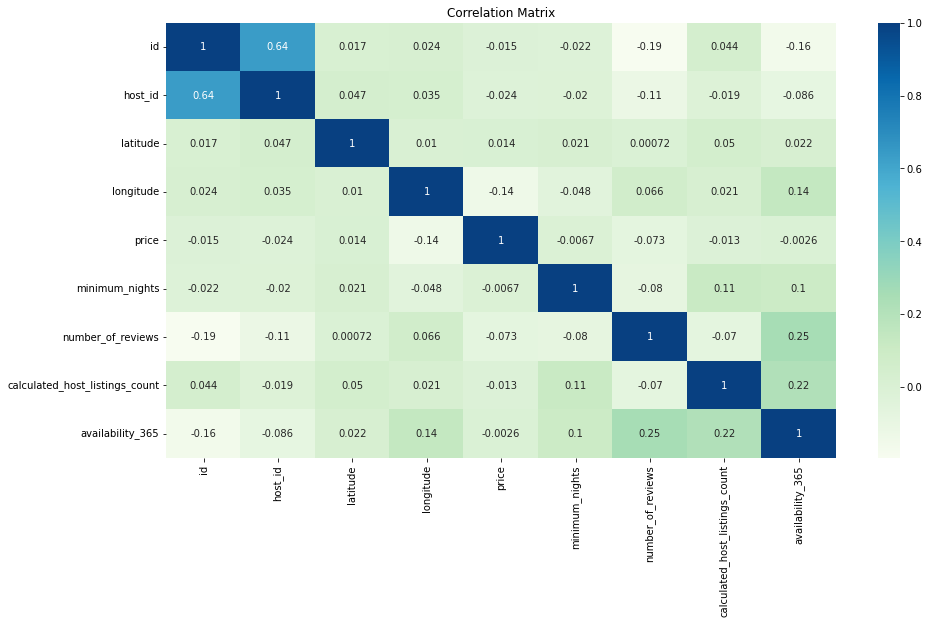

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='GnBu')
plt.title('Correlation Matrix')

**Here we can see, independent features are very less correlated to our dependent feature 'Price'.**

#Data Distribution

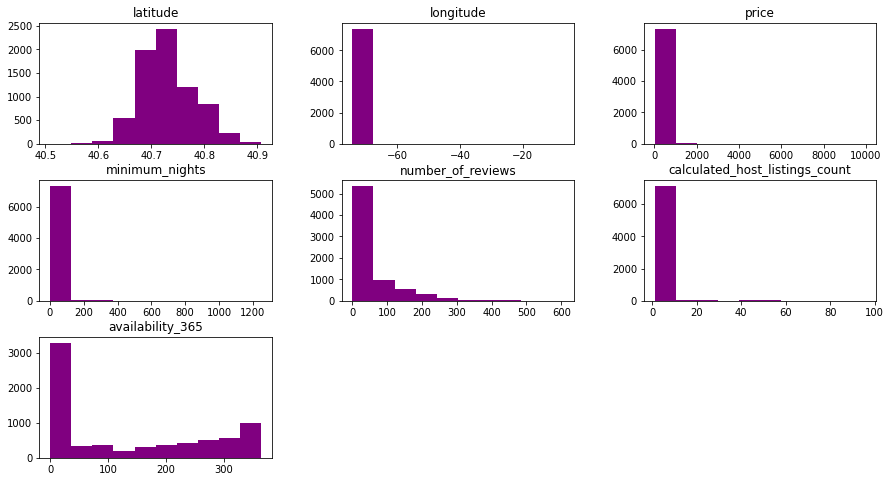

In [ ]:
# Viewing distribution of numeric data
numerical_data = df.select_dtypes(exclude='object').drop(['id', 'host_id'], axis = 1)
dist= numerical_data.hist(figsize=(15,8), grid = False, color = 'purple')

**We have plotted the data distribution plots for the numerical features present in the dataset. The distribution shows that most of the features are positively skewed.**

## * What can we learn about different hosts and areas?


In [ ]:
# Lets see who has the most listings and in which neighbourhood
host_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(10)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
1660,Jeremy & Laura,Manhattan,96.0
3655,Vida,Brooklyn,52.0
2525,Mike,Manhattan,52.0
3354,Stat,Queens,43.0
3353,Stat,Brooklyn,43.0
1448,Host,Manhattan,39.0
1805,Juliana,Manhattan,34.0
5,AFI Apartments,Manhattan,29.0
3511,The Box House Hotel,Brooklyn,28.0
282,Anthony,Manhattan,26.0


**From above result, we can conclude that the name of the host with most listings is Sonder(NYC) which has 327 listings in Manhattan.**

<function matplotlib.pyplot.show(*args, **kw)>

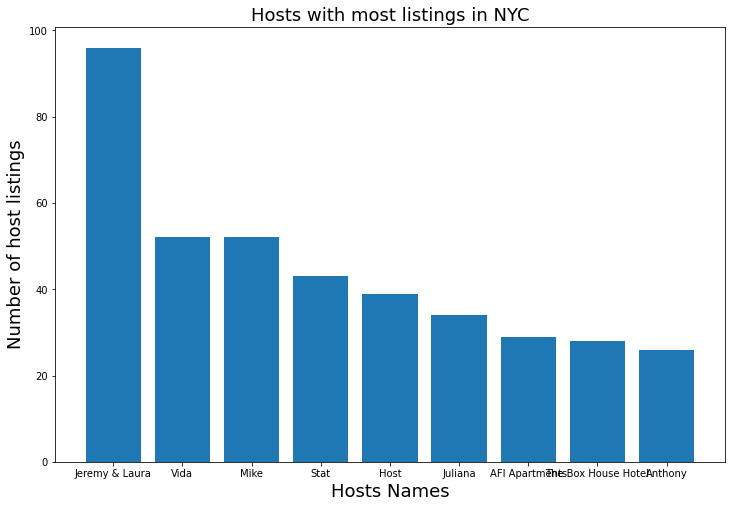

In [ ]:
# Visualizing the host with most listings
plt.figure(figsize = (12,8))
host_name = top_hosts['host_name']
host_listing = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_listing)
plt.title('Hosts with most listings in NYC',{'fontsize':18})
plt.xlabel('Hosts Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show

**Sonder(NYC) is the host with most listings with 327 listings.**

In [ ]:
# Number of Airbnb listed in each neighbourhood
data = df.groupby(['neighbourhood_group'])['id'].count().reset_index().rename(columns = {'id':'count'}).sort_values(by = 'count', ascending = False)
data.head()

,neighbourhood_group,count
2,Manhattan,3420
1,Brooklyn,3289
3,Queens,542
0,Bronx,99
4,Staten Island,41


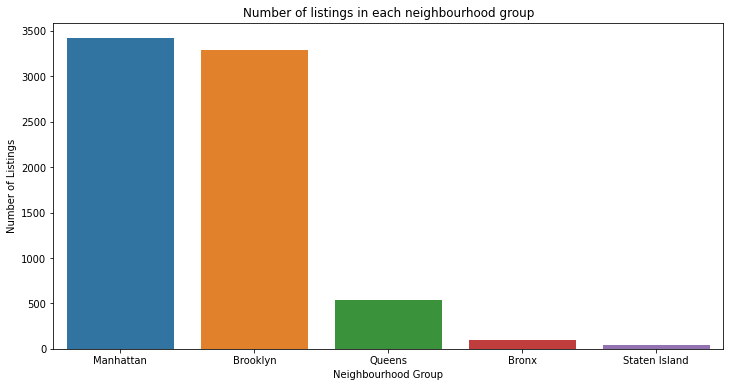

In [ ]:
# Visualizing the number of listings in each neighbourhood through bar plot
plt.rcParams['figure.figsize'] = (12,6)
ax = sns.barplot(x = data ['neighbourhood_group'], y = data['count'], data = data)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of Listings')
ax.set_title('Number of listings in each neighbourhood group')
plt.show()

**Around 85% of listings are held in neighbourhood groups Manhattan and Brooklyn.**

## * Which are the hottest areas of transaction?

In [ ]:
# Exploring neighbourhood
df['neighbourhood'].value_counts().iloc[:10]

Williamsburg          696
Bedford-Stuyvesant    530
Harlem                472
East Village          378
Upper West Side       370
Upper East Side       292
Crown Heights         279
Bushwick              258
Greenpoint            252
Hell's Kitchen        231
Name: neighbourhood, dtype: int64

In [ ]:
# Listing all neighbourhoods
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

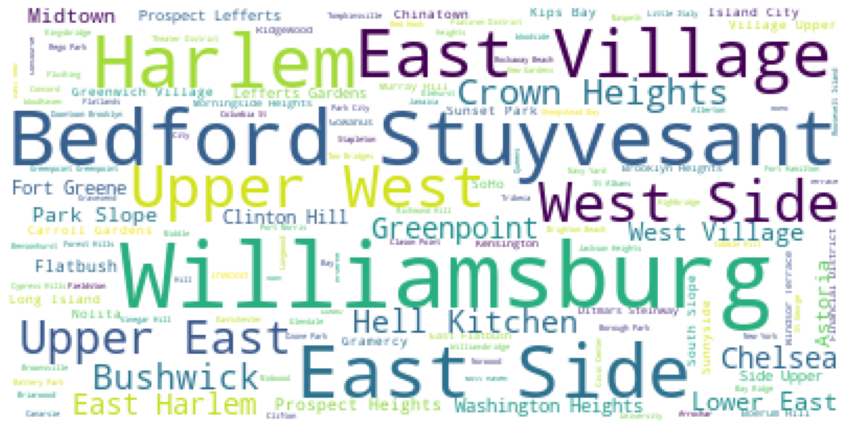

In [ ]:
# Using wordcloud to visualize hottest neighbourhoods
wordcloud = WordCloud(background_color = 'white').generate(" ".join(df['neighbourhood']))
plt.figure(figsize = (15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**In terms of listings, Bedford Stuyvesant, Hell Kitchen, East Side are the most important neighbourhoods in NYC.**


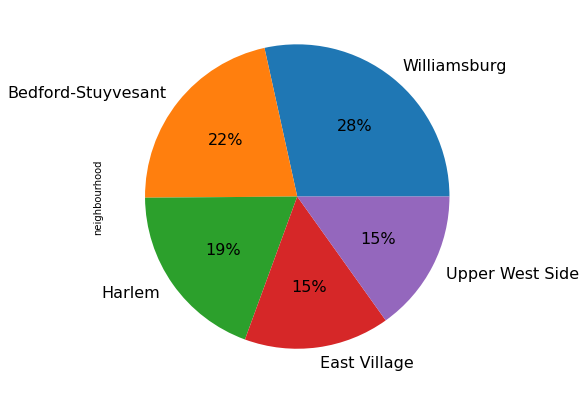

In [ ]:
# Visualizing it through pie chart
plt.figure(figsize = (7,7))
df['neighbourhood'].value_counts().iloc[:5].plot(kind = 'pie', autopct = '%1.0f%%', startangle = 360, fontsize = 16)

**Top 5 areas by percentage in the dataset.**
**Williamsburg is the hottest area of transaction.**

## * How are reviews are compared with neighbourhood groups?

In [ ]:
# Finding which neighbourhood has got maximum number of reviews
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
areas_reviews

,neighbourhood_group,number_of_reviews
2,Manhattan,607.0
1,Brooklyn,488.0
3,Queens,474.0
4,Staten Island,333.0
0,Bronx,321.0


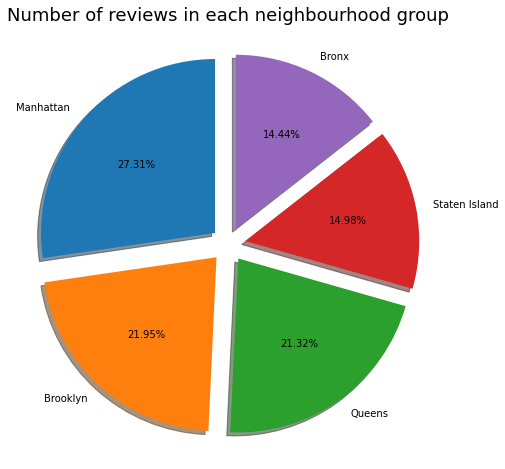

In [ ]:
# Visualising the number of reviews in each neighbourhood group through pie chart
plt.rcParams['figure.figsize'] = (13,8)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews,labels = areas_reviews['neighbourhood_group'], autopct= '%0.2f%%', startangle = 90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True)
plt.title('Number of reviews in each neighbourhood group', {'fontsize' : 18})
plt.show()

**The share percentage of reviews for each neighbourhood group is depicted above.It can be stated that Queens, Manhattan has majority of reviews which implies that people are liking these neighbourhoods. Also from these neighbourhoods majority revenue is generated for the company.**

## * What price distribution tells us?

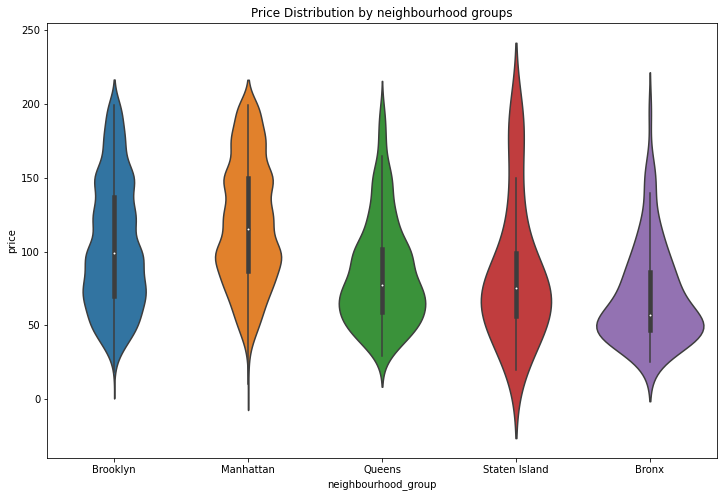

In [ ]:
# Now lets see the price distribution by neighbourhood groups
plt.figure(figsize = (12,8))
ax = sns.violinplot(x = 'neighbourhood_group', y = 'price', data = df[df.price < 200]).set_title('Price Distribution by neighbourhood groups')
plt.show()

**By looking at the violin plot, we can see that Manhattan has a higher price range and is the most expensive one. Brooklyn has the second highest rental prices, while the Bronx appears as the most affordable one.**

## *Which hosts are the busiest and why?

In [ ]:
# Busiest would be those who have maximum number of reviews as people are booking frequently at those hosts.
busiest_hosts = df.groupby(['host_name','neighbourhood_group'])['host_id'].count().sort_values(ascending=False).head(10)
busiest_hosts

host_name            neighbourhood_group
Michael              Manhattan              48
Mike                 Manhattan              47
Vida                 Brooklyn               42
David                Manhattan              30
The Box House Hotel  Brooklyn               28
Michael              Brooklyn               25
Brian                Manhattan              24
David                Brooklyn               24
Host                 Manhattan              24
Daniel               Manhattan              24
Name: host_id, dtype: int64

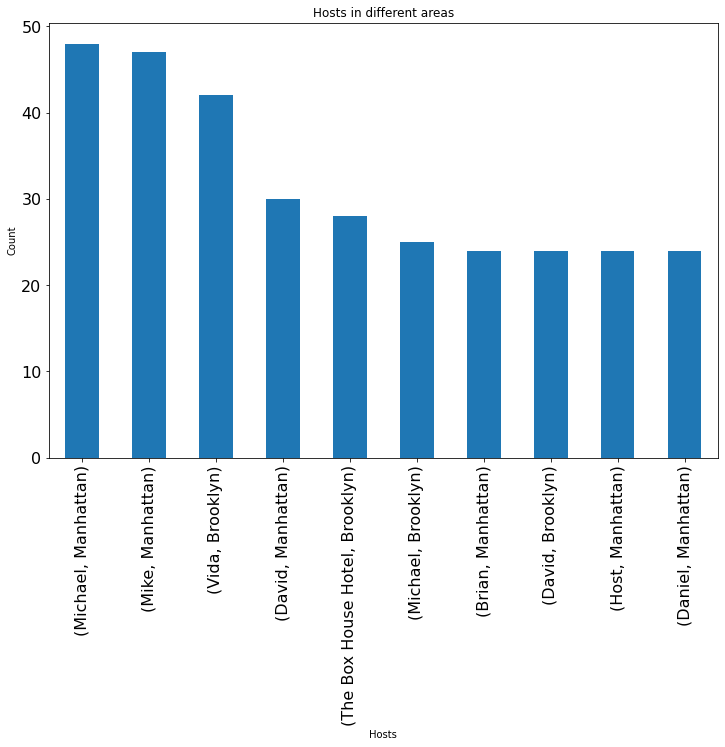

In [ ]:
# Visualising the busiest host data through bar plot
plt.figure(figsize=(12, 8))
plt.title("Hosts in different areas")
busiest_hosts.plot(kind='bar', fontsize = 16, xlabel = 'Hosts', ylabel = 'Count')

**Top 10 busiest hosts. Sonder (NYC) is the busiest host in NYC. Also, most hosts are from the Manhattan neighbourhood group.**

## *What types of rooms are prefered by people respective to the regions?

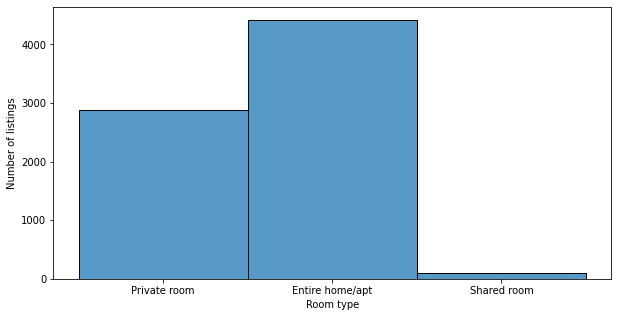

In [ ]:
# Plotting histogram for room types to look for which are most preferred room types
plt.rcParams['figure.figsize'] = (10,5)
hp = sns.histplot(df['room_type'])
hp.set_xlabel('Room type')
hp.set_ylabel('Number of listings')
plt.show()

**People mostly prefer to rent Private room or Entire home/apt. Very few people are considering to a share a room.**

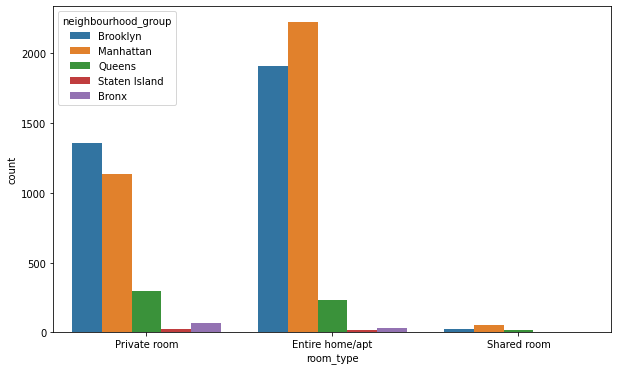

In [ ]:
#plotting room type as per neighbourhood group
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'room_type', hue = 'neighbourhood_group')

**Entire home is the highest service used across New York City. In Brooklyn, Private rooms are used more than entire home. Shared room type is very less likely to be prefered by people.**

## *How room types are distributed among neighbourhood groups?

Text(0.5, 1.0, 'Distribution of type of rooms across NYC coordinates')

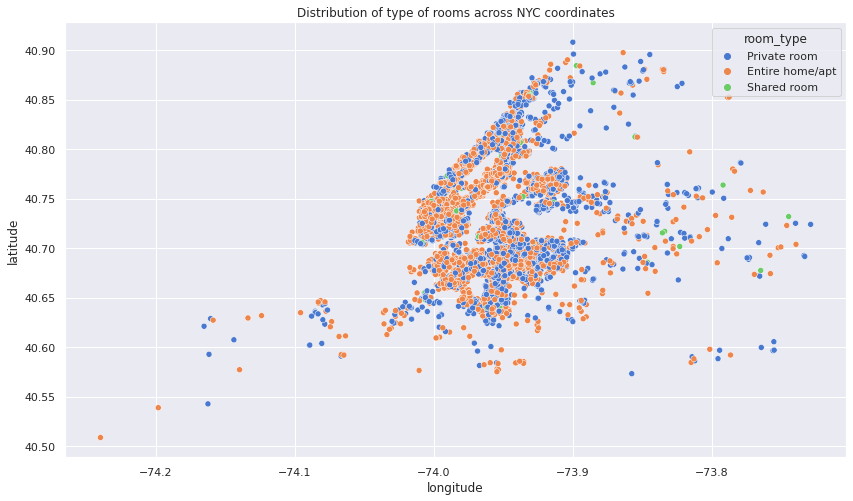

In [ ]:
#coordinates of listings as per room type
sns.set(rc={"figure.figsize": (14, 8)})
ax= sns.scatterplot(x=df.longitude, y=df.latitude,hue=df.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC coordinates')

**Above scatterplot shows that entire home and private room listings are very dense. There are very few shared room listings as per the location coordinates.**

Text(0.5, 1.0, 'Location Co-ordinates')

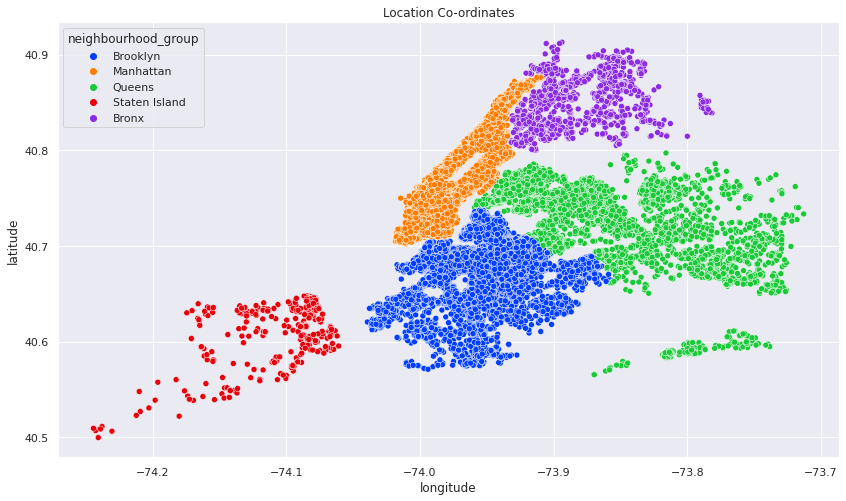

In [ ]:
#coordinates of listings of each neighbourhood group
sns.set(rc={"figure.figsize": (14, 8)})
ax= sns.scatterplot(x=df.longitude, y=df.latitude,hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

**Manhattan and Brooklyn are high density neighbourhood groups with respect to listings. Some areas of Staten Island and Bronx are very remotely located which makes them cheaper than other listings.**

Conclusions -


1.   Sonder is the busiest host in New York.
2.   Entire home are costly than other room types
3.   Most visitors don’t prefer shared rooms, they tend to visit private room or entire home.
4.   Manhattan has the highest number of listings.
5.   Bronx has most number of cheap rooms.
6.   Queens have more reviews than Manhattan even though Queens has less listings.

